In [25]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [30]:
#Loading data
movie_data = pd.read_csv('C:/Users/Bhavi/Desktop/Data Science/Data/file.tsv', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
movie_titles = pd.read_csv('C:/Users/Bhavi/Desktop/Data Science/Data/Movie_Id_Titles.csv')

In [31]:
#Checking shape of the data
movie_data.shape, movie_titles.shape

((100003, 4), (1682, 2))

In [32]:
#Viewing the data
display(movie_data.head())
display(movie_titles.head())

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [33]:
#Merging the both the data based on item ID
data = pd.merge(movie_data, 
                movie_titles, 
                on='item_id')
data

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [35]:
#Computing mean of rating based on each title
data.groupby('title')['rating'].mean().sort_values(ascending = False).to_frame()

,rating
title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0
...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0
King of New York (1990),1.0
Touki Bouki (Journey of the Hyena) (1973),1.0


In [36]:
#Computing count of rating based on each title
data.groupby('title')['rating'].count().sort_values(ascending = False).to_frame()

,rating
title,
Star Wars (1977),584
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485
...,...
"Great Day in Harlem, A (1994)",1
"Other Voices, Other Rooms (1997)",1
Good Morning (1971),1


In [37]:
#Creating dataframe with rating count values
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings['num_of_ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
ratings = ratings.sort_values(by = 'num_of_ratings', ascending=False)
ratings

,rating,num_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


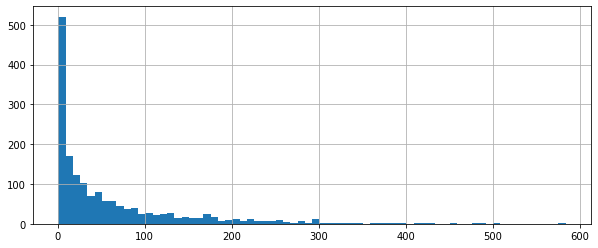

In [38]:
#Creating histogram on rating
plt.figure(figsize=(10,4))
ratings['num_of_ratings'].hist(bins = 70);

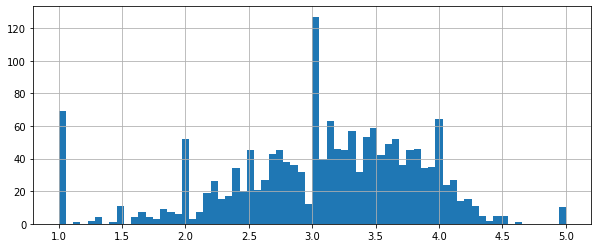

In [39]:
#Creating histogram on rating
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins = 70);

In [40]:
#Creating pivot table with user id and title based on rating
moviemat = data.pivot_table(index = 'user_id', 
                            columns = 'title', 
                            values = 'rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
starwar_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
starwar_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [42]:
similar_to_starwars = moviemat.corrwith(starwar_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

corr_starwars = pd.DataFrame(similar_to_starwars, columns= ['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [43]:
corr_starwars.sort_values('Correlation', ascending=False).head()
corr_starwars = corr_starwars.join(ratings['num_of_ratings'])
corr_starwars.head()

,Correlation,num_of_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [44]:
moviemat.corrwith(moviemat['Star Wars (1977)'])

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [45]:
def recommender_system(movie_name):
    movie_rating = moviemat[movie_name]
    similar_to_movie_rating = moviemat.corrwith(movie_rating)
    corr_df = pd.DataFrame(similar_to_movie_rating, columns= ['Correlation'])
    corr_df.dropna(inplace=True)
    corr_df = corr_df.sort_values('Correlation', ascending = False)
    corr_df1 = corr_df.join(ratings['num_of_ratings'])
    corr_df2 = corr_df1[corr_df1['num_of_ratings']>100].sort_values('Correlation', ascending = False)
    return corr_df2.head(5)

In [17]:
recommender_system('Star Wars (1977)')

c:\users\bhavi\python\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\users\bhavi\python\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,num_of_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [20]:
corr_starwars[corr_starwars['num_of_ratings']>100].sort_values('Correlation', ascending=False).head()

,Correlation,num_of_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [21]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns= ['Correlation'])
corr_liarliar.dropna(inplace=True)

corr_liarliar.sort_values('Correlation', ascending=False).head()
corr_liarliar = corr_liarliar.join(ratings['num_of_ratings'])
corr_liarliar[corr_liarliar['num_of_ratings']>100].sort_values('Correlation', ascending=False).head()

,Correlation,num_of_ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


In [22]:
recommender_system('Liar Liar (1997)')

c:\users\bhavi\python\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\users\bhavi\python\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,num_of_ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
